<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logot.png" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Berat Yenilen <br>
        Edited by Utku Birkan, Arda Çınar, Özlem Salehi | May 8, 2020<br>
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Bernstein-Vazirani Algorithm </h2>

Let $\textbf{x} \cdot \textbf{s}$ represent the inner product of the bit strings modulo 2. 

For instance if $x = 1000$ and $s = 1010$, then $x\cdot s = 1.1 + 0.0 + 0.1 + 0.0 = 1 \pmod 2 = 1$

<b>Problem:</b> Given an oracle function $f:\{0,1\}^n \rightarrow \{0,1\}$, which is defined as $ f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{s} $, find the string $\mathbf{s}$.


This might come across as a bit of an artificially created problem, because it is. It was specifically designed to be solved using a quantum computer in order to show there can be be advantages in using quantum algorithms over probabilistic algorithms.

Let's start by giving an example of such an $f$.

\begin{align*}
	f(00)&=0\\
	f(01)&=1\\
	f(10)&=0\\
	f(11)&=1\\
	\end{align*}
    
In this example, $s$ is $01$, as $f(00)=00\cdot 01=0$, $f(01)=01\cdot 01 = 1$, $f(10)=10\cdot01=0$ and $f(11)=11\cdot01=1$.
    
  

Note that now the unitary operator $U_f$ takes the following form: $ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus x \cdot s} $. 



### Task 1

- How many queries do we need to make if we are to solve the problem clasically? How many queries if you use a probabilistic algorithm?
- How many queries do you think we need to make if we are to solve the problem with a quantum computer ? 

<a href="B93_Bernstein-Vazirani_Solutions.ipynb#task1">click for our solution</a>

### Task 2

- What can we say about the $f$ function if $s = 0$?
- How can we implement the $U_{f}$ oracle as a quantum circuit?

### Algorithm

We use exactly the same algorithm as Deutsch-Jozsa.

We construct a circuit with $n+1$ qubits. 

- Set the $n+1$'st qubit to state $\ket{-}.$
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits to obtain $s$.

 <img src="../images/deutschjozsa.png" width="50%" align="center">


### Analysis

The solution circuit will be the same circuit as the Deutsch-Jozsa circuit. So, we start the same way (with the input qubits, the output qubit and the $H$ gates.

$$ \ket{\psi_0} = \ket{0}^{\otimes n} \otimes \ket{-} $$

$$ \ket{\psi_1} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-} $$

From now on we can ignore the output qubit and focus on our input qubits. After applying $U_f$ we then get the same state:

$$ \ket{\psi_{2}}= \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \ket{x} $$

Let's replace $f(x) = x \cdot s$, and rewrite our state as follows:

$$ \ket{\psi_{2}} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot s} \ket{x} $$

From the previous notebook we know the following expression: $$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot z} \ket{z} $$.

We also know that the $H^{\otimes n}$ operator is its own inverse. Thus, we can say that $H^{\otimes n}\ket{a} = \ket{b} \Longleftrightarrow H^{\otimes n}\ket{b} = \ket{a}$. So in fact, $\ket{\psi_2}$ is the state obtained after applying $H^{\otimes n}$ to $\ket{s}$

Hence after applying $H^{\otimes n}$ to the input qubits, we get the final state as 

$$\ket{\psi_{3}} = \ket{s}$$. 

We measure the first $n$ qubits and we observe the string $s$ with probability 1.

Note that this is also an exact algorithm without any errors as the algorithms we have seen so far.

### Task 3

Given an oracle function `bv_oracle()` that constructs a 6 qubit oracle circuit ($s$ has lengeh 5) for $f$,construct a circuit that implements the algorithm described above to find out $s$.

Run the following cell to load function bv_oracle()

In [2]:
%run oracle.py

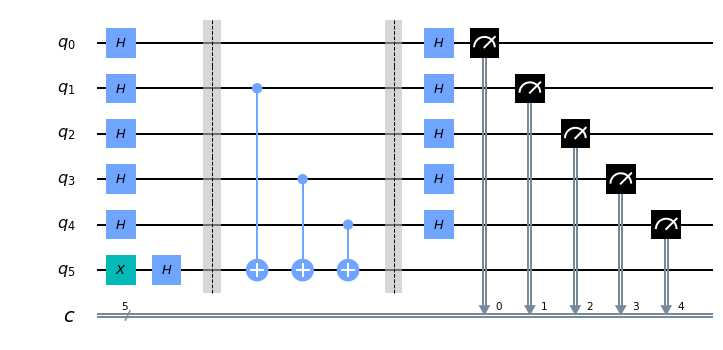

In [4]:
from qiskit import QuantumCircuit, execute, Aer

n=5  

bv_circuit = QuantumCircuit(n+1, n)

#Your code here

bv_circuit.draw(output="mpl")

In [5]:
job = execute(bv_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'11010': 10000}


<a href="B93_Bernstein-Vazirani_Solutions.ipynb#task3">click for our solution</a>

### Task 4

Given $\textbf{s} = 0110$, implement a function that returns an oracle for the function $f$.

In [ ]:
from qiskit import QuantumCircuit

def oracle():
    
    #Your code here

<a href="B93_Bernstein-Vazirani_Solutions.ipynb#task4">click for our solution</a>

Now finally, we have an algorithm which provides speedup in the query model also against probabilistic algorithms, although not exponential.